In [82]:
%matplotlib inline
from fermi_model import *

states10 = csv_to_states_from_filename('states10.csv')

ほしいのは、エネルギー準位ごとのdiff

In [9]:
diff_dct = {}
for state in states10:
    if diff_dct.get(state.score):
        diff_dct[state.score][state.diff_from_ground] += 1
    else:
        diff_dct[state.score] = {k: 0 for k in range(State.n)}
        diff_dct[state.score][state.diff_from_ground] += 1

In [15]:
diff_dct 
# lim_sizeを設けているから65εで止まっているが、lim_sizeがなく、より大きなエネルギー準位を考えていけば、diff 9 のやつらとかも出てくる。

{45: {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 46: {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 47: {0: 0, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 48: {0: 0, 1: 3, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 49: {0: 0, 1: 4, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 50: {0: 0, 1: 5, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 51: {0: 0, 1: 6, 2: 5, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 52: {0: 0, 1: 7, 2: 8, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 53: {0: 0, 1: 8, 2: 14, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 54: {0: 0, 1: 9, 2: 20, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 55: {0: 0, 1: 10, 2: 30, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 56: {0: 0, 1: 10, 2: 40, 3: 5, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 57: {0: 0, 1: 10, 2: 55, 3: 10, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 58: {0: 0, 1: 10, 2: 69, 3: 18, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 59: {0: 0, 1: 10, 2: 88, 3: 30, 4: 0, 5: 0, 6: 0,

In [11]:
def calc_diff_1_num(E, n):
    diff_1_num = E - int(n * (n-1) / 2)
    return diff_1_num if diff_1_num <= n else n

In [12]:
calc_diff_1_num(53, 10)

8

[1.00000000e+000 1.28700546e-011 7.24217759e-017 ... 5.04522529e-107
 3.78444152e-107 2.92088755e-107]


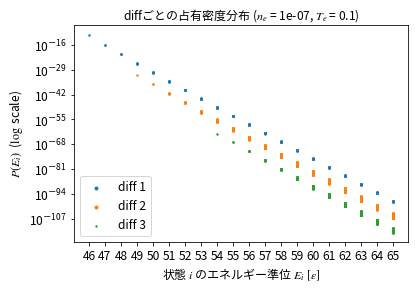

In [1]:
%matplotlib inline
from fermi_model import *

# 5.5min
plot_population_per_diff(ne=1e-7, Te=0.1, e_num=10)

In [6]:
def plots_population(
    ne_lst: list[float],
    Te: float = 0.5,
    use_power: bool = True,
    xlim: tuple[float] = None,
    ylim: tuple[float] = None,
    figsize: tuple[float] = None,
    labelsize: int = None,
    titlesize: int = None,
) -> None:
    """
    各neの値におけるフェルミガスモデルを構築し、総エネルギーを横軸にとり、縮退状態を別々で考えた各状態の占有密度を縦軸logスケールでプロットする
    """
    scores = None
    states3 = csv_to_states_from_filename()
    if figsize is not None:
        plt.figure(figsize=figsize)
    for ne in tqdm(ne_lst):
        fermi = Fermi(states3, equ=False, Te=Te, ne=ne, threshold=1e-10)
        scores, population = fermi.calc_population(use_power)
        plt.scatter(scores, population, label=fr"$n_e$={ne}", s=2, alpha=0.3)
    # plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, fontsize=labelsize)
    plt.legend(loc="lower left", fontsize=labelsize)
    plt.title(fr"占有密度分布 ($T_e$ = {Te})", fontsize=titlesize)
    plt.yscale("log")
    plt.xlabel(r"状態 $i$ のエネルギー準位 $E_i$ $[\epsilon]$", fontsize=labelsize)
    plt.ylabel(r"$P(E_i)$  ($\log$ scale)", fontsize=labelsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    scores_ordered_set = sorted([*set(scores)])
    plt.xticks(scores_ordered_set)
    plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

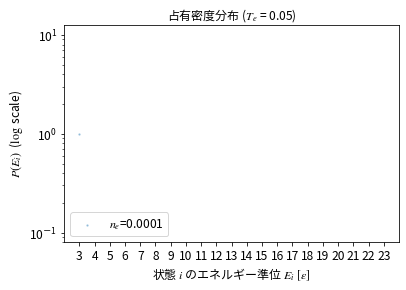

In [7]:
plots_population(ne_lst=[1e-4], Te=0.05)

  0%|          | 0/1 [00:00<?, ?it/s]

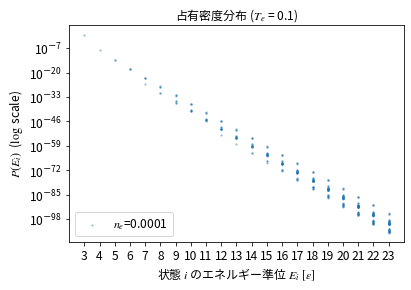

In [8]:
plots_population(ne_lst=[1e-4], Te=0.1)

  0%|          | 0/1 [00:00<?, ?it/s]

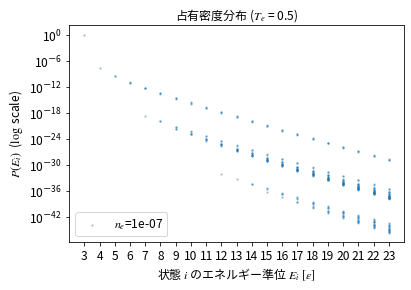

In [4]:
plots_population(ne_lst=[1e-7], Te=0.5)

In [51]:
%matplotlib inline
from fermi_model import *

Te = 0.01; ne=1e-05


states3 = csv_to_states_from_filename()
fermi = Fermi(states3, equ=False, Te=Te, ne=ne, threshold=1e-10)

In [52]:
# (scores_per_state_1, population_1), (scores_per_state_2, population_2), (scores_per_state_3, population_3) = fermi.calc_population_per_diff()

In [53]:
def sum_along_axis(matrix: NDArray[np.float64], axis: int = 0):
    return np.apply_along_axis(np.sum, axis, matrix)


In [62]:
fermi._make_matrices()

def power_method(matrix: NDArray[np.float64], eigen: float, threshold: float) -> NDArray[np.float64]:
    x = np.zeros(matrix.shape[0])
    x[0] = 1
    cnt = 1
    while cnt < 1000000:
        y = np.dot(matrix, x)
        cur_eigen = np.dot(y, y) / np.dot(y, x)
        x = y / np.linalg.norm(y)
        cnt += 1
    while True:
        y = np.dot(matrix, x)
        cur_eigen = np.dot(y, y) / np.dot(y, x)
        if np.abs(eigen - cur_eigen) < threshold:
            return x
        x = y / np.linalg.norm(y)

In [63]:
C_ = np.diag(sum_along_axis(fermi.excitation, 1))
F_ = np.diag(sum_along_axis(fermi.deexcitation, 0))
C = fermi.excitation
F = fermi.deexcitation
coeff = C_ - F - C.T + F_
A_ = np.diag(sum_along_axis(fermi.emission, 0))
A = fermi.emission
coeff += A_ - A
fermi.coeff = coeff

eigen = np.max(np.abs(np.diag(coeff)))
non_negative_matrix = -coeff + eigen * np.eye(C.shape[0])
x = power_method(non_negative_matrix, eigen, fermi.threshold)
solution =  x / np.sum(x)


In [64]:
x

array([1.00000000e+000, 3.71970401e-048, 1.53778239e-092, 1.53778239e-092,
       1.43020258e-136, 1.77526254e-136, 1.43020258e-136, 1.91538003e-180,
       2.58809791e-180, 5.46959926e-184, 2.58809791e-180, 3.16683513e-224,
       4.39794747e-224, 8.12844488e-228, 4.98224499e-224, 8.12844488e-228,
       6.01065443e-268, 8.36099849e-268, 1.44324273e-271, 3.66933451e-272,
       1.01548182e-267, 1.54720990e-271, 3.66933451e-272, 1.25775600e-311,
       1.73283528e-311, 2.85731825e-315, 6.30473411e-316, 2.18135402e-311,
       3.22923953e-315, 6.71673086e-316, 6.71673086e-316, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [57]:
solution

array([1.00000000e+000, 3.33456821e-048, 1.53776447e-092, 1.53776447e-092,
       1.43018735e-136, 1.77526254e-136, 1.43018735e-136, 1.91536001e-180,
       2.58809791e-180, 5.00848486e-184, 2.58809791e-180, 3.16680220e-224,
       4.39794747e-224, 7.39083443e-228, 4.98224499e-224, 7.39083443e-228,
       6.01059206e-268, 8.36099849e-268, 1.31004036e-271, 3.66929625e-272,
       1.01548182e-267, 1.39561084e-271, 3.66929625e-272, 1.25774296e-311,
       1.73283528e-311, 2.59218134e-315, 6.30466825e-316, 2.18135402e-311,
       2.90723143e-315, 6.71665709e-316, 6.71665709e-316, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [58]:
scores_per_state = [state.score for state in fermi.states]

C:\Users\GENKIK~1\AppData\Local\Temp/ipykernel_13424/946366737.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim((1e-400, 10000))


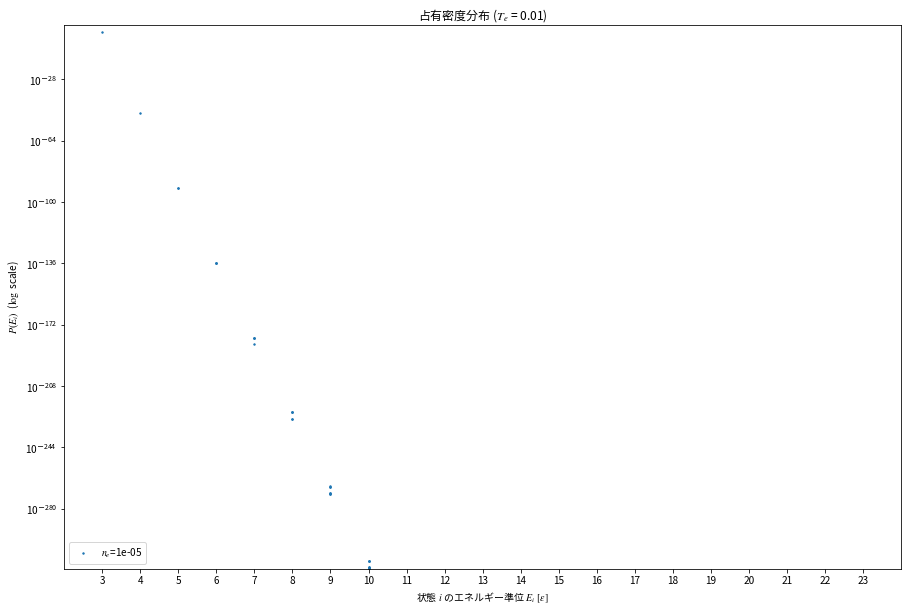

In [59]:
plt.figure(figsize=(15, 10))
plt.scatter(scores_per_state, solution, label=fr"$n_e$={ne}", s=2, alpha=1.0)
# plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, fontsize=labelsize)
plt.legend(loc="lower left")
plt.title(fr"占有密度分布 ($T_e$ = {Te})")
plt.yscale("log")
plt.xlabel(r"状態 $i$ のエネルギー準位 $E_i$ $[\epsilon]$")
plt.ylabel(r"$P(E_i)$  ($\log$ scale)")
scores_ordered_set = sorted([*set(scores_per_state)])
plt.ylim((1e-400, 10000))
plt.xticks(scores_ordered_set)
plt.show()

In [34]:
solution

array([1.00000000e+000, 8.26313920e-016, 2.11102482e-025, 2.11102482e-025,
       1.08778674e-034, 1.35035547e-034, 1.08778674e-034, 8.07154437e-044,
       1.09074881e-043, 9.44046743e-050, 1.09074881e-043, 7.39408584e-053,
       1.02695596e-052, 7.71863224e-059, 1.16340461e-052, 7.71863224e-059,
       7.77568719e-062, 1.08172766e-061, 7.58036377e-068, 2.12291867e-068,
       1.31382242e-061, 8.07557772e-068, 2.12291867e-068, 9.01512331e-071,
       1.24215358e-070, 8.31053692e-077, 2.02102320e-077, 1.56368441e-070,
       9.32069511e-077, 2.15309216e-077, 2.15309216e-077, 1.12406932e-079,
       1.52703697e-079, 9.86431705e-086, 2.21788550e-086, 1.15548658e-086,
       1.95280588e-079, 1.13758690e-085, 2.36135660e-086, 2.46201965e-086,
       1.49763138e-086, 1.48280292e-088, 1.98327260e-088, 1.24514710e-094,
       2.65759068e-095, 1.23173992e-095, 2.54679776e-088, 1.45361970e-094,
       2.86649814e-095, 1.36823596e-095, 3.03148886e-095, 1.65713306e-095,
       9.66914092e-102, 2

In [10]:
n = 10
lim = 30
diff_1_dct = {}


for i in range(n):
    for j in range(n, lim):
        after_trans = int(n * (n-1) / 2) + j - i
        if diff_1_dct.get(after_trans):
            diff_1_dct[after_trans] += 1
        else:
            diff_1_dct[after_trans] = 1

In [11]:
diff_1_dct

{55: 10,
 56: 10,
 57: 10,
 58: 10,
 59: 10,
 60: 10,
 61: 10,
 62: 10,
 63: 10,
 64: 10,
 65: 10,
 66: 9,
 67: 8,
 68: 7,
 69: 6,
 70: 5,
 71: 4,
 72: 3,
 73: 2,
 74: 1,
 54: 9,
 53: 8,
 52: 7,
 51: 6,
 50: 5,
 49: 4,
 48: 3,
 47: 2,
 46: 1}

In [24]:
from itertools import combinations

n = 10
lim = 50
diff_2_dct = {}

for i, i_ in combinations(range(n), 2):
    for j, j_ in combinations(range(n, lim), 2):
        after_trans = int(n * (n-1) / 2) + j + j_ - i - i_
        if diff_2_dct.get(after_trans):
            diff_2_dct[after_trans] += 1
        else:
            diff_2_dct[after_trans] = 1

In [25]:
{k: v for k, v in sorted(diff_2_dct.items(), key=lambda item: item[0])}

{49: 1,
 50: 2,
 51: 5,
 52: 8,
 53: 14,
 54: 20,
 55: 30,
 56: 40,
 57: 55,
 58: 69,
 59: 88,
 60: 105,
 61: 127,
 62: 146,
 63: 170,
 64: 190,
 65: 215,
 66: 235,
 67: 260,
 68: 280,
 69: 305,
 70: 325,
 71: 350,
 72: 370,
 73: 395,
 74: 415,
 75: 440,
 76: 460,
 77: 485,
 78: 505,
 79: 530,
 80: 550,
 81: 575,
 82: 595,
 83: 620,
 84: 640,
 85: 665,
 86: 685,
 87: 710,
 88: 729,
 89: 752,
 90: 768,
 91: 787,
 92: 798,
 93: 811,
 94: 815,
 95: 820,
 96: 815,
 97: 811,
 98: 798,
 99: 787,
 100: 768,
 101: 752,
 102: 729,
 103: 710,
 104: 685,
 105: 665,
 106: 640,
 107: 620,
 108: 595,
 109: 575,
 110: 550,
 111: 530,
 112: 505,
 113: 485,
 114: 460,
 115: 440,
 116: 415,
 117: 395,
 118: 370,
 119: 350,
 120: 325,
 121: 305,
 122: 280,
 123: 260,
 124: 235,
 125: 215,
 126: 190,
 127: 170,
 128: 146,
 129: 127,
 130: 105,
 131: 88,
 132: 69,
 133: 55,
 134: 40,
 135: 30,
 136: 20,
 137: 14,
 138: 8,
 139: 5,
 140: 2,
 141: 1}

In [23]:
for i in combinations(range(3), 2):
    print(i)

(0, 1)
(0, 2)
(1, 0)
(1, 2)
(2, 0)
(2, 1)
